<a href="https://colab.research.google.com/github/camelliatea/proyek-analisis-sentimen/blob/main/Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install and Import Library**

In [ ]:
# Install modul google-play-scaper
!pip install google-play-scraper

In [ ]:
# Import library google-play-scraper dan pandas
from google_play_scraper import reviews_all, Sort
import pandas as pd

In [ ]:
# Install Sastrawi dan import Stemmer Factory untuk steming bahasa Indonesia
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# Import library NLTK untuk preprocessing teks
import nltk

# Download resource NLTK yang dibutuhkan:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Import fungsi untuk tokenisasi kata dan filtering stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import numpy as np
import re               # Untuk regular expression
import unicodedata      # Untuk normalisasi karakter unicode
import string           # Untuk manipulasi karakter dan tanda baca
import csv              # Untuk membaca file CSV
import requests         # Untuk mengirim permintaan HTTP
from io import StringIO # Untuk mengubah string menjadi file-like object
from sklearn.feature_extraction.text import TfidfVectorizer # Mengubah teks menjadi numerik berbasis TF-IDF

In [ ]:
# Import library untuk membuat visualisasi
from wordcloud import WordCloud  # Visualisasi berbentuk awan kata (word cloud) dari teks
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mengambil 50000 ulasan relevan dari aplikasi Canva dari pengguna Indonesia
result = reviews_all(
    'com.canva.editor',       # id Canva
    lang='id',                # bahasa Indonesia
    country='id',             # negara Indonesia
    sort=Sort.MOST_RELEVANT,  # untuk ulasan paling relevan
    count=50000               # Jumlah ulasan yang diambil
)

In [ ]:
# Konversi ke DataFrame
df = pd.DataFrame(result)

In [ ]:
# Informasi umum dari DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              108000 non-null  object        
 1   userName              108000 non-null  object        
 2   userImage             108000 non-null  object        
 3   content               108000 non-null  object        
 4   score                 108000 non-null  int64         
 5   thumbsUpCount         108000 non-null  int64         
 6   reviewCreatedVersion  92653 non-null   object        
 7   at                    108000 non-null  datetime64[ns]
 8   replyContent          35111 non-null   object        
 9   repliedAt             35111 non-null   datetime64[ns]
 10  appVersion            92653 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.1+ MB


In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,976e8f99-a7bc-419c-9958-d260fe33b903,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Setelah update, Canva ada bug. Biasanya saat mau pilih gambar, ada opsi folder2 foto sesuai nama folder di album HP kita, sekarang hanya trsedia 2 opsi, gambar dan video saja. Jadi sangat sulit mencari foto apa yg mau di upload, harus nge-scroll jauh. Kalau fotonya di tahun2 sebelumnya jadi susah banget harus scroll jauh. Tolong bug ini cepat diperbaiki !!!",3,1,2.306.0,2025-04-04 05:28:47,"Hai Natalia, terima kasih telah menghubungi Canva. Kami mohon maaf atas ketidaknyamanan ini. Masalah yang memengaruhi beberapa pengguna kami dalam melakukan tugas seperti mengunggah, mengunduh desain, dsb., telah teratasi. Jika kesalahan masih berlanjut, hubungi kami di canva.me/android. Salam. - Cynch",2025-04-06 02:32:24,2.306.0
1,5274cee6-bcf0-4a64-832f-2453a91da93d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Menggunakan Canva pro memang banyak pilihannya tapi kenapa beberapa template atau design yang Pro kurang bagus? Malah lebih bagus yang Free. Coba berhenti menggunakan yang Pro, ternyata yang Free sering bermasalah: Server kami mengalami masalah. Kasihan.. 😀",4,32,2.305.0,2025-03-23 14:51:48,"Hai Sahroni, terima kasih telah menghubungi Canva. Kami mohon maaf atas ketidaknyamanan ini. Silakan kirim laporan terperinci tentang masalah Anda di canva.me/android agar kami dapat membantu Anda lebih lanjut. Nantikan pembaruan dan penyempurnaan kami. Salam. - Jane",2025-03-25 02:10:43,2.305.0
2,82ec6264-f315-4b1f-aab8-b2e6042e100d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Kecewa banget!! Padahal termasuk penggunaan setia canva Masak mau bikin desain malah pas buka apknya gak bisa2 masuk, alasannya karena jaringan Mulu. Padahal jaringan bagus, di pakek apk lain juga aman, sampe copot pasang tetep gak bisa masuk Kecewa banget sih, abis di update malah makin buruk kinerjanya",1,46,2.304.0,2025-03-15 09:35:01,"Hai Himatul, terima kasih kerana menghubungi Canva. Kami kesal mendengar bahawa anda masih menghadapi masalah mengakses apl. Kebimbangan anda memerlukan siasatan lanjut untuk kami mendapatkan penyelesaian. Sila hantarkan laporan kepada kami di canva.me/android dan pakar sokongan kami akan menghubungi anda kembali. salam hormat. - Sentap",2025-03-17 06:25:18,2.304.0
3,f9beaf06-1d97-43af-830a-c9606eb6c3a1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"TOLONG UNTUK DEVELOPER DIBACA!! sbenernya aplikasi udah bagus sekali kak, tapi baru saja saya masuk ke aplikasi malah tidak bisa katanya saya offline padahal saya baru isi paket data dan jaringannya stabil, tolong untuk developer diperbaiki ya, saya ada deadline tugas 3 hari lagi kak, TOLONG SEKALIIII🙏🙏🙏",1,49,2.304.0,2025-03-15 14:34:10,"Halo Dnzdnsanss, terima kasih atas masukan Anda dan telah menggunakan Canva. Kami mohon maaf jika Anda mengalami masalah konektivitas. Silakan periksa tautan ini untuk informasi selengkapnya: bit.ly/3cKcqM1. Jika ini tidak membantu, hubungi kami di canva.me/android untuk bantuan lebih lanjut. Pantau terus pembaruan kami. Salam. - Jane",2025-03-17 06:06:29,2.304.0
4,a669246c-2df2-476f-a5e0-bc01dd6a8afb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Tolong tambahkan fitur sembunyikan seperti di pixellab, agar lebih mudah untuk menampilkan hal yang perlu ditampilkan, jadi tidak hapus/mundurkan edit lagi hapus/mundurkan edit lagi😥🙏, tapi selebihnya bagus banget sih menurut saya ini adalah aplikasi edit foto/gambar

Insight:

Dari target awal (50.000 ulasan) pengumpulan data ulasan aplikasi Canva di Google Play Store, data yang berhasil dikumpulkan sebanyak 108.000 entri data yang mencakup berbagai versi aplikasi dan ulasan pengguna.
- Kolom `reviewCreatedVersion` dan `appVersion` hanya memiliki 92.653 data, yang dapat diartikan bahwa tidak semua pengguna mencantumkan versi aplikasi saat memberikan ulasan.
- Kolom `replyContent` dan `repliedAt` hanya memiliki 35.111 data, yang menunjukkan bahwa tidak semua ulasan mendapatkan balasan dari developer.
- Kolom `content` memiliki data lengkap yang dapat digunakan untuk analisis lebih lanjut.

# **Data Cleaning**

In [ ]:
# Mengisi missing values pada kolom tertentu dengan nilai 'Unknown'
df.update(df[['reviewCreatedVersion', 'repliedAt', 'replyContent', 'appVersion']].fillna('Unknown'))

# Membuat salinan DataFrame
clean_df = df.copy()

In [ ]:
# Memeriksan duplikasi data
print(f'Data Duplikat: {clean_df.duplicated().sum()}')

Data Duplikat: 0


In [ ]:
# Memeriksa informasi umum DataFrame setelah pembersihan
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              108000 non-null  object        
 1   userName              108000 non-null  object        
 2   userImage             108000 non-null  object        
 3   content               108000 non-null  object        
 4   score                 108000 non-null  int64         
 5   thumbsUpCount         108000 non-null  int64         
 6   reviewCreatedVersion  108000 non-null  object        
 7   at                    108000 non-null  datetime64[ns]
 8   replyContent          108000 non-null  object        
 9   repliedAt             108000 non-null  object        
 10  appVersion            108000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 9.1+ MB


Insight:
- Kolom dengan missing values diisi dengan nilai 'Unknown' untuk menghindari kehilangan data penting lainnya saat proses analisis.
- Sebelum melanjutkan ke tahap pembersihan atau pemrosesan lebih lanjut, dibuat salinan DataFrame `clean_df` agar data asli tetap terjaga dan bisa digunakan kembali jika dibutuhkan.
- Duplikasi data tidak ditemukan dalam DataFrame, sehingga tidak diperlukan proses penghapusan duplikasi.

# **Text Preprocessing**

**Fungsi untuk membersihkan teks dari elemen tidak relevan**

In [ ]:
def cleaningText(text):
  # Menghapus karakter selain huruf dan angka
  text = re.sub(r'[^\w\s,]', '', text)
  # Menghapus angka
  text = re.sub(r'[0-9]+', '', text)
  # Mengganti garis baru dengan spasi
  text = text.replace('\n', ' ')
  # Menghapus tanda baca
  text = text.translate(str.maketrans('', '', string.punctuation))
  # Menghapus karakter spasi dari kiri dan kanan teks
  text = text.strip(' ')
  # Menghapus huruf berlebih di belakang
  text = re.sub(r'(.)\1+', r'\1\1', text)
  # Menghapus karakter non-alfabet
  text = re.sub(r'[^A-Za-z\s]', '', text)
  # Menghapus karakter unicode yang tidak standar
  text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
  return text

**Fungsi untuk mengubah seluruh karakter menjadi huruf kecil**

In [ ]:
def caseFoldingText(text):
  text = text.lower()
  return text

**Fungsi untuk mengubah teks menjadi daftar token**

In [ ]:
def tokenizingText(text):
  text = word_tokenize(text)
  return text

**Fungsi untuk menyederhanakan kata-kata**

In [ ]:
def stemmingText(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = text.split()
  stemmed_words = [stemmer.stem(word) for word in words]
  stemmed_text = ' '.join(stemmed_words)
  return stemmed_text

**Fungsi untuk mengonversi daftar kata yang telah diproses menjadi kalimat**

In [ ]:
def toSentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

**Slangwords dan fungsi untuk penanganannya**

In [ ]:
slangwords = {
    'abalabal':'tidak asli','abiees':'habis','abis':'habis','abisin':'habiskan','abisny':'habisnya','abiss':'habis','abissin':'habiskan','abistu':'habis itu','sy':'saya',
    'sya':'saya','tapi':'tetapi', 'yg':'yang','bgt':'banget','bgtt':'banget','apk':'aplikasi','pls':'tolong','plis':'tolong','udah':'sudah','tp':'tetapi','krn':'karena',
    'karna':'karena','kayaknya':'sepertinya','sampah':'buruk','eleek':'jelek','grati':'gratis','nge-lag':'macet','eror':'error','udh':'sudah','app':'aplikasi',
    'baguss':'bagus','bagusss':'bagus','hrs':'harus','apknya':'aplikasinya','appnya':'aplikasinya','utk':'untuk','ig':'instagram','yt':'youtube','ytb':'youtube','twt':'twitter',
    'elek':'jelek','gakuat':'tidak mampu','spek':'spesifikasi','hp':'handphone','gabakal':'tidak akan','ber kali kali':'berkali-kali','pilih kasih':'tidak adil','lamaa':'lama',
    'secuprit':'sedikit sekali','ampe':'sampai','sampe':'sampai','ngedit':'mengedit','ngeditnya':'mengeditnya','skrg':'sekarang','dah':'sudah','sdh':'sudah','leg':'macet',
    'unduuh':'unduh','install':'memasang aplikasi', 'uninstall':'mencopot aplikasi', 'instal':'memasang aplikasi', 'uninstal':'mencopot aplikasi', 'ush':'sudah','vidio':'video',
    'kelar²':'kelar-kelar','bagu':'bagus', 'kayak':'seperti','pdhl':'padahal','gabisa':'tidak bisa','ok':'oke','broser':'browser','dlu':'dulu','bsa':'bisa','jgn':'jangan',
    'prnh':'pernah','gpp':'tidak apa-apa', 'gapapa':'tidak apa-apa','lagii':'lagi','okelah':'oke lah','jan':'jangan','pke':'pakai','bngt':'banget','anj':'anjing','paraah':'parah',
    'jngn':'jangan','dowload':'unduh','sbenernya':'sebenarnya', 'download':'unduh', 'sekalii':'sekali','hapusmundurkan':'hapus mundurkan','pake':'pakai','terimakasih':'terima kasih',
    'lag':'macet','bug':'kesalahan dalam aplikasi', 'ngebug':'kesalahan dalam aplikasi','nyoba':'mencoba','mesti':'harus','ga bisa':'tidak bisa','benarbenar':'benar-benar',
    'pdahal':'padahal','ktika':'ketika','tetep':'tetap','goggle':'google','mulu':'terus-terusan','dll':'dan lain-lain','kya':'seperti','nyobain':'mencoba','bkin':'bikin',
    'saking':'sangat','beratlemot':'berat lemot','segitu':'seperti itu','segini':'seperti ini','hehehe':'he','hehe':'he','lol':'tertawa','wa':'whatsapp','min':'admin',
    'minn':'admin','sblmny':'sebelumnya','sblmnya':'sebelumnya','haha':'tertawa','laen':'lain','ilang':'hilang','fb':'facebook','jg':'juga','jga':'juga','fotogambar':'foto gambar',
    'golder':'folder','kyk':'seperti','tmn':'teman','segi':'sisi','penuh²':'penuh-penuh','jd':'jadi','jdi':'jadi','tsb':'tersebut','tdk':'tidak','tpi':'tetapi','lg':'lagi',
    'lgi':'lagi','gini':'seperti ini','gitu':'seperti itu','trs':'terus','trus':'terus','sy':'saya','gw':'saya','gua':'saya','gue':'saya','klo':'kalau','kl':'kalau','dri':'dari',
    'dr':'dari','gimana':'bagaimana','knp':'kenapa','bgus':'bagus','bgs':'bagus','kalo':'kalau','fotodesain':'foto desain','nyebelin':'menyebalkan','mantul':'mantap betul',
    'cuan':'untung','goks':'gokil','bt':'kesal','ksl':'kesal','kesel':'kesal','ksel':'kesal','gaje':'tidak jelas','sbl':'sebal','sbel':'sebal','bangett':'banget','bangettt':'banget',
    'abiz':'habis','abuabu':'abu-abu','acakacakan':'acak-acakan','acak²':'acak-acak','acak²an':'acak-acakan','acak²kan':'acak-acakan','acak²n':'acak-acakan','acc':'akun',
    'accept':'terima','account':'akun','acount':'akun','ad':'ada','adaa':'ada','andro':'android','androit':'android','ane':'saya','aneeh':'aneh','aneehh':'aneh','anehh':'aneh',
    'animek':'anime','anjayy':'anjing','anjdri':'anjing','anjeng':'anjing','anjengg':'anjing','anjerr':'anjing','anjg':'anjing','anjgg':'anjing','anjgmaen':'anjing main',
    'anjiing':'anjing','anjim':'anjing','anjingg':'anjing','anjing':'anjing','anjingr':'anjing','anjingt':'anjing','anjj':'anjing','anjjrr':'anjing','anjlok':'anjlok',
    'anjng':'anjing','anjngg':'anjing','anjr':'anjing','anjrot':'anjing','anjrt':'anjing','anjweengg':'anjing','annjirirr':'anjing','annjj':'anjing','anrb':'anjing','anying':'anjing',
    'ap':'apa','apaa':'apa','apaae':'apa','apaandah':'apa ini deh','apaapa':'apa-apa','apaapaan':'apa-apaan','apabial':'apabila','apalg':'apalagi','apalgi':'apalagi',
    'apalikasi':'aplikasi','apalikasinya':'aplikasinya','apamisal':'apa misal','apan':'apa','apansii':'apan sih','apanya':'apanya','apapaan':'apa-apaan','apapadahal':'apa padahal',
    'apapain':'apa-apain','apapunaplikasi':'apapun aplikasi','aparttemen':'apartemen','apasi':'apa sih','apasih':'apa sih','apasihh':'apa sih','apasumah':'apa sih emang',
    'apatapi':'apa tapi','apauji':'apa uji','apa²':'apa-apa','apa²an':'apa-apaan','apa²in':'apa-apain','apdet':'update','ape':'apa','apebiar':'apa biar','apgrade':'upgrade',
    'apgred':'meningkatkan','apiikbagus':'bagus','apik':'bagus','apikasi':'aplikasi','apikasinya':'aplikasinya','apiknya':'bagusnya','apilaskinya':'aplikasinya',
    'apilikasinya':'aplikasinya','apilkasi':'aplikasi','apkasinya':'aplikasinya','apke':'pake','apkikasi':'aplikasi','apkk':'aplikasi','apkklo':'aplikasi kalau',
    'apklikasinya':'aplikasinya','apkny':'aplikasinya','apknyaa':'aplikasinya','apknyatpi':'aplikasinya tapi','apkpas':'aplikasi pas','apks':'aplikasi','aplikasix':'aplikasinya',
    'aplikasi²':'aplikasi-aplikasi','abs':'abis','ngeleg':'macet','ppt':'powerpoint', 'kek':'seperti','kasi':'kasih','make':'pakai', 'makasih':'terima kasih', 'apl':'aplikasi',
    'bs':'bisa', 'dgn':'dengan', 'uninstal':'uninstall', 'blm':'belum', 'gk':'tidak', 'ngga':'tidak', 'nggak':'tidak', 'km':'kamu', 'lu':'kamu','lo':'kamu','loe':'kamu',
    'abal':'tidak asli', 'accelerated':'dipercepat', 'adaaneh':'ada yang aneh', 'adacuma':'ada hanya', 'cuma':'hanya', 'cuman':'hanya', 'adadan':'ada dan', 'adaerror':'ada error',
    'adahaapadahal':'ada padahal', 'adahal':'padahal', 'adain':'adakan', 'adajadi':'ada jadi', 'adakah': 'apakah ada', 'adakurang':'ada kurang', 'adalohh':'ada loh',
    'adasy':'ada saya', 'adathx':'ada terima kasih', 'add':'tambah', 'additional':'tambahan', 'addmin':'admin', 'adek':'adik', 'adi':'adil', 'adit':'hadir',
    'adjustment':'penyesuaian', 'adl':'adalah', 'administratorprogrammer':'administrator pemrograman', 'adminn':'admin', 'adminya':'adminnya', 'ads':'ada',
    'adsgrstisan':'ada gratis', 'aering':'sering', 'aesthetic':'estetika', 'aestheticque':'estetika', 'aflikasi':'aplikasi', 'afdol':'afdal', 'aga':'agak', 'agaa':'agak',
    'agakk':'agak', 'agakragu':'agak ragu', 'agal':'agak', 'agax':'agaknya', 'aggak':'agak', 'agk':'agak', 'agr':'agar', 'ahaha':'tertawa', 'ahahahaa':'tertawa',
    'ahhkenapa':'ah kenapa', 'ahilah':'Ya Allah', 'ahir':'akhir', 'ahirnya':'akhirnya', 'ahkir':'akhir', 'ahlisukses':'ahli sukses', 'zonk':'bodoh', 'zonkk':'bodoh', 'zhong':'bodoh',
    'zoossgendozz':'luar biasa', 'yutup':'youtube', 'yutube':'youtube', 'yutub':'youtube', 'yupss':'ya','yup':'ya', 'yukk':'ayo', 'yuk':'ayo', 'yuga':'juga', 'yu':'ayo',
    'yth':'yang terhormat', 'ysaran':'saran', 'acakkan':'acakan', 'acakn':'acakan', 'ahmulai':'ah mulai', 'ahsapa':'ah siapa', 'aidil':'adil', 'ailahkan':'silakan', 'aing':'saya',
    'aitem':'hitam', 'aj':'saja', 'ajaa':'saja', 'ajaaku':'saja aku', 'ajaapaan':'saja ada apa', 'ajabahkan':'saja bahkan', 'ajabanyak':'saja banyak', 'ajaboas':'saja bias',
    'ajach':'saja', 'ajadepelofernya':'saja developernya', 'ajaga':'saja tidak', 'ajagak':'saja tidak', 'ajaganti':'saja ganti', 'ajagimana':'saja bagaimana', 'ajagw':'saja saya',
    'ajah':'saja', 'ajahh':'saja', 'ajaini':'saja ini', 'ajaj':'saja', 'aja jujur':'saja jujur', 'ajakarena':'saja karena', 'ajakenapa':'saja kenapa', 'ajaknp':'saja kenapa',
    'ajakok':'saja kok', 'ajakrna':'saja karena', 'ajalah':'saja lah', 'ajalahhgak':'saja lah tidak', 'ajalh':'saja lah', 'ajamohon':'saja mohon', 'ajangabisi':'saja tidak bisa',
    'ajarestrat':'saja mulai ulang', 'ajarr':'ajar', 'ajarsni':'ajar ini', 'ajasemoga':'saja semoga', 'ajasi':'saja sih', 'ajasih':'saja sih', 'ajasoal':'saja soal',
    'ajasumpah':'saja sumpah', 'ajatapi':'saja tetapi', 'ajatdk':'saja tidak', 'ajatidak':'saja tidak', 'ajatolong':'saja tolong', 'ajaversi':'saja versi', 'aje':'saja',
    'ajg':'anjing', 'ajgapk':'anjing aplikasi', 'ajgg':'anjing', 'ajggduit':'anjing uang', 'ajh':'saja', 'ajib':'keren', 'ajibb':'keren', 'ajig':'anjing', 'ajim':'anjing',
    'ajing':'anjing', 'ajini':'saja nih', 'ajj':'saja', 'ajja':'saja', 'ajuin':'ajukan', 'ak':'saya', 'aka':'saya','akasih':'kasih', 'akau':'aku', 'ake':'aku',
    'akhirakhir':'akhir-akhir', 'akhirini':'akhir ini', 'akhirny':'akhirnya', 'akhornya':'akhirnya', 'aki':'aku', 'akir':'akhir', 'akirakhir':'akhir-akhir', 'akirnya':'akhirnya',
    'akkanan':'akan', 'akn':'akan', 'akpnya':'aplikasinya', 'aksenya':'aksesnya', 'aksesharus':'akses harus', 'aktifin':'aktifkan', 'aktifitas':'aktivitas',
    'aktifitasku':'aktivitasku', 'aktifjadi':'aktif jadi', 'aktip':'aktif', 'aktiv':'aktif', 'akui':'mengakui', 'akuin':'mengakui', 'akunbelajarid':'akun belajarid',
    'akungak':'akun tidak', 'akunkami':'akun kami', 'akunku':'akun saya', 'akunnya':'akunnya', 'akuntheres':'akun', 'akunudah':'akun sudah', 'akuny':'akunnya', 'akunya':'akunnya',
    'akupun':'saya pun', 'akusaya':'akun saya', 'akusi':'akurasi', 'akusuka':'saya suka', 'akuteh':'saya', 'akutu':'saya', 'akuu':'saya', 'alah':'Allah',
    'alahadulillah':'alhamdulillah','alasannyayg':'alasannya yang', 'alasanpadahal':'alas an padahal', 'alasanya':'alasannya', 'alay':'norak', 'albiol':'album', 'albumgaleri':'album galeri',
    'alertnya':'peringatannya', 'alesan':'alasan', 'alesannya':'alasannya', 'alfa':'alpa', 'alhamdulilah':'alhamdulillah', 'alhamdulillaah':'alhamdulillah',
    'alhamdulillahaplikasi':'alhamdulillah aplikasi', 'alhamdulillahh':'alhamdulillah', 'alhamdulillahsetelah':'alhamdulillah setelah',
    'alhamdulillahtrmksh':'alhamdulillah terima kasih', 'alhamdullilah':'alhamdulillah', 'alhmdulillah':'alhamdulillah', 'alhsil':'alhasil', 'aliass':'alias', 'alihin':'alihkan',
    'alikasi':'aplikasi', 'alikasinya':'aplikasinya', 'alkhamdulillah':'alhamdulillah', 'allaah':'Allah', 'allah':'Allah', 'allahamdulilah':'alhamdulillah', 'allahh':'Allah',
    'allahmancing':'Allah mancing', 'allhamdulilah':'alhamdulillah', 'allhamdulillah':'alhamdulillah', 'alloh':'Allah', 'allooh':'Allah', 'allow':'izin', 'alpikasi':'aplikasi',
    'alpikasinya':'aplikasinya', 'alpilakasi':'aplikasi', 'alplikasi':'aplikasi', 'alus':'halus', 'amaat':'banget', 'amanaman':'aman aman', 'amandamai':'aman damai',
    'amangimana':'aman bagaimana', 'amann':'aman', 'amansangat':'aman sangat', 'amatekspor':'banget ekspor', 'amatt':'banget', 'amazing':'luar biasa',
    'amazingsangat':'luar biasa sangat', 'amet':'banget', 'ammpunn':'ampun', 'amnn':'aman', 'ampass':'sampah', 'ampir':'hampir', 'amplikasi':'aplikasi', 'amplikasinya':'aplikasinya',
    'ampunn':'ampun', 'ampuntrus':'ampun terus', 'ampuun':'ampun', 'ampuunn':'ampun', 'ampuunterpaksa':'ampun terpaksa', 'ampyun':'ampun', 'ampyuunn':'ampun', 'amzing':'luar biasa',
    'anakanak':'anak-anak', 'anakorganisasi':'anak organisasi', 'ancrit':'anjing', 'ancur':'hancur', 'andalgi':'kamu lagi', 'andapadahal':'kamu padahal', 'andavsudah':'kamu sudah',
    'andorid':'android', 'androiduser':'pengguna android', 'aneherror':'aneh error', 'anehmendingan':'aneh lebih baik', 'anehpdhl':'aneh padahal', 'anehsaya':'aneh saya',
    'angkot':'angkutan umum','anis':'habis', 'anjay':'anjing', 'anjir':'anjing', 'anjirr':'anjing', 'anjirrbilangnya':'anjing bilangnya', 'anjirrsinyal':'anjing sinyal',
    'anjirsayang':'anjing sayang', 'anjirt':'anjing', 'anjtiba':'anjing tiba', 'anjudah':'anjing sudah', 'ank':'anjing', 'annoying':'mengganggu', 'antrian':'antrean', 'apaan':'apa',
    'apaanhadehh':'apa hadeh', 'apaansih':'apa sih', 'apaansihh':'apa sih', 'apaansimasa':'apa sih masa', 'apaapain':'apa-apa', 'apaasiihh':'apa sih', 'apah':'apa',
    'apain':'diapakan', 'apaintinya':'apa intinya', 'apak':'apa', 'apakok':'apa kok', 'apaksih':'apa sih', 'apalagilamafix':'apalagi lama fix', 'apalah':'apa sih', 'apan':'apa',
    'apapuntapi':'apapun tetapi', 'apkbiar':'aplikasi agar', 'apknyasudah':'aplikasinya sudah', 'apknyatolong':'aplikasinya tolong', 'apksering':'aplikasi sering',
    'apksnya':'aplikasinya', 'apktrus':'aplikasi terus', 'apkudh':'aplikasi udah', 'apkx':'aplikasinya', 'apkya':'aplikasinya', 'apla':'apa', 'aplakasinya':'aplikasinya',
    'aplgi':'apalagi', 'apliaksi':'aplikasi', 'apliaksinya':'aplikasinya', 'aplication':'aplikasi', 'aplicationsmga':'aplikasi semoga', 'aplijasi':'aplikasi', 'aplikaai':'aplikasi',
    'aplikaainy':'aplikasinya', 'aplikaasi':'aplikasi', 'aplikadi':'aplikasi', 'aplikadinya':'aplikasinya', 'aplikali':'aplikasi', 'aplikas':'aplikasi', 'aplikash':'aplikasi',
    'aplikasia':'aplikasi', 'aplikasiapaapa':'aplikasi apa', 'aplikasidan':'aplikasi dan', 'aplikasih':'aplikasi', 'aplikasihnya':'aplikasinya', 'aplikasii':'aplikasi',
    'aplikasijelekk':'aplikasi jelek', 'aplikasikalo':'aplikasi kalau', 'aplikasiklo':'aplikasi kalau', 'aplikasilelet':'aplikasi lelet', 'aplikasimisalnya':'aplikasi misalnya',
    'aplikasin':'aplikasi', 'aplikasine':'aplikasinya', 'aplikasini':'aplikasi ini', 'aplikasinnya':'aplikasinya', 'aplikasiny':'aplikasinya', 'aplikasinyaa':'aplikasinya',
    'aplikasinyaamantaps':'aplikasinya mantap', 'aplikasinyadan':'aplikasinya dan', 'aplikasinyafiturnya':'aplikasinya fiturnya', 'aplikasinyagak':'aplikasi tidak',
    'aplikasinyalengkap':'aplikasinya lengkap', 'aplikasinyamasih':'aplikasi masih', 'aplikasinyamudah':'aplikasi mudah', 'aplikasinyap':'aplikasinya',
    'aplikasinyapadahal':'aplikasinya padahal', 'aplikasinyarecommended':'aplikasinya recommended', 'aplikasinyarugi':'aplikasinya rugi', 'aplikasinyasangat':'aplikasinya sangat',
    'aplikasinyasaya':'aplikasinya saya', 'aplikasinyasemoga':'aplikasinya semoga', 'aplikasinyatolong':'aplikasinya tolong', 'aplikasinyaudah':'aplikasinya sudah',
    'aplikasinyayang':'aplikasinya yang', 'aplikasinyq':'aplikasinya', 'aplikasinys':'aplikasinya', 'aplikasinytp':'aplikasinya tetapi', 'aplikasipadahal':'aplikasi padahal'

}

# Fungsi untuk penanganan slangwords
def fix_slangwords(text):
    words = text.split()
    fixed_words = [slangwords.get(word.lower(), word) for word in words]
    return ' '.join(fixed_words)

**Fungsi untuk menghapus stopwords dalam teks**

In [ ]:
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwordsEn = set(stopwords.words('english'))
    #tambahan stopwords
    add_stopwords = {'iya','yaa','gak','nya','na','sih','ku','di','ga','ya','an','gaa','loh','kah','woi','woii','woy', 'eh', 'aduh', 'woilah', 'g', 'ngga', 'acell', 'acorp',
                    'kak','aduh', 'si', 'doi','mh', 'dung', 'pa', 'aja', 'ohh', 'nge', 'ko', 'ni', 'ntu', 'aa','aada',	'aah',	'aahh',	'aahhkk',	'aamiin',	'aammiin',	'aapk',	'aasrrggfhh',	'aaya', 'ya','yg','ah','ish','ny',
                     'yah', 'tuh','nih','deh','doang', 'adu','aduhh','aduuh','ae','aeal','ahh','ah','ahkk', 'zz','zf','yya','yy','aissh','akh', 'akhh','al', 'ala'}
    listStopwords.update(listStopwordsEn)
    listStopwords.update(add_stopwords)
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

**Menjalankan seluruh fungsi**

In [ ]:
# Membersihkan teks
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah seluruh teks menjadi memakai huruf kecil
clean_df['text_caseFoldingText'] = clean_df['text_clean'].apply(caseFoldingText)

# Mengganti slangwords dengan kata umum
clean_df['text_slangwords'] = clean_df['text_caseFoldingText'].apply(fix_slangwords)

# Melakukan tokenisasi
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus stopword
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token menjadi kalimat
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_caseFoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,976e8f99-a7bc-419c-9958-d260fe33b903,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Setelah update, Canva ada bug. Biasanya saat mau pilih gambar, ada opsi folder2 foto sesuai nama folder di album HP kita, sekarang hanya trsedia 2 opsi, gambar dan video saja. Jadi sangat sulit mencari foto apa yg mau di upload, harus nge-scroll jauh. Kalau fotonya di tahun2 sebelumnya jadi susah banget harus scroll jauh. Tolong bug ini cepat diperbaiki !!!",3,1,2.306.0,2025-04-04 05:28:47,"Hai Natalia, terima kasih telah menghubungi Canva. Kami mohon maaf atas ketidaknyamanan ini. Masalah yang memengaruhi beberapa pengguna kami dalam melakukan tugas seperti mengunggah, mengunduh desain, dsb., telah teratasi. Jika kesalahan masih berlanjut, hubungi kami di canva.me/android. Salam. - Cynch",2025-04-06 02:32:24,2.306.0,Setelah update Canva ada bug Biasanya saat mau pilih gambar ada opsi folder foto sesuai nama folder di album HP kita sekarang hanya trsedia opsi gambar dan video saja Jadi sangat sulit mencari foto apa yg mau di upload harus ngescroll jauh Kalau fotonya di tahun sebelumnya jadi susah banget harus scroll jauh Tolong bug ini cepat diperbaiki,setelah update canva ada bug biasanya saat mau pilih gambar ada opsi folder foto sesuai nama folder di album hp kita sekarang hanya trsedia opsi gambar dan video saja jadi sangat sulit mencari foto apa yg mau di upload harus ngescroll jauh kalau fotonya di tahun sebelumnya jadi susah banget harus scroll jauh tolong bug ini cepat diperbaiki,setelah update canva ada kesalahan dalam aplikasi biasanya saat mau pilih gambar ada opsi folder foto sesuai nama folder di album handphone kita sekarang hanya trsedia opsi gambar dan video saja jadi sangat sulit mencari foto apa yang mau di upload harus ngescroll jauh kalau fotonya di tahun sebelumnya jadi susah banget harus scroll jauh tolong kesalahan dalam aplikasi ini cepat diperbaiki,"[setelah, update, canva, ada, kesalahan, dalam, aplikasi, biasanya, saat, mau, pilih, gambar, ada, opsi, folder, foto, sesuai, nama, folder, di, album, handphone, kita, sekarang, hanya, trsedia, opsi, gambar, dan, video, saja, jadi, sangat, sulit, mencari, foto, apa, yang, mau, di, upload, harus, ngescroll, jauh, kalau, fotonya, di, tahun, sebelumnya, jadi, susah, banget, harus, scroll, jauh, tolong, kesalahan, dalam, aplikasi, ini, cepat, diperbaiki]","[update, canva, kesalahan, aplikasi, pilih, gambar, opsi, folder, foto, sesuai, nama, folder, album, handphone, trsedia, opsi, gambar, video, sulit, mencari, foto, upload, ngescroll, fotonya, susah, banget, scroll, tolong, kesalahan, aplikasi, cepat, diperbaiki]",update canva kesalahan aplikasi pilih gambar opsi folder foto sesuai nama folder album handphone trsedia opsi gambar video sulit mencari foto upload ngescroll fotonya susah banget scroll tolong kesalahan aplikasi cepat diperbaiki
1,5274cee6-bcf0-4a64-832f-2453a91da93d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Menggunakan Canva pro memang banyak pilihannya tapi kenapa beberapa template atau design yang Pro kurang bagus? Malah lebih bagus yang Free. Coba berhenti menggunakan yang Pro, ternyata yang Free sering bermasalah: Server kami mengalami masalah. Kasihan.. 😀",4,32,2.305.0,2025-03-23 14:51:48,"Hai Sahroni, terima kasih telah menghubungi Canva. Kami mohon maaf atas ketidaknyamanan ini. Silakan kirim laporan terperinci tentang masalah Anda di canva.me/android agar kami dapat membantu Anda lebih lanjut. Nantikan pembaruan dan penyempurnaan kami. Salam. - Jane",2025-03-25 02:10:43,2.305.0,Menggunakan Canva pro memang banyak pilihannya tapi kenapa beberapa template atau design ya

# Pelabelan

In [ ]:
# Membaca data kamus kata-kata positif dari GitHub
kosakata_positif = dict()   # Membuat kamus kosakata_positif

# Mengirim permintaan HTTP untuk memperoleh file CSV dari GitHub
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

# Jika pemintaan berhasil
if response.status_code == 200:
  reader = csv.reader(StringIO(response.text), delimiter=',')   # Membaca teks respons sebagai file CSV
  for row in reader:
    kosakata_positif[row[0]] = int(row[1])                      # Menambahkan kata-kata positif dan skornya ke dalam kamus kosakata_positif
else:
  print('Gagal mengambil data kosakata positif.')               # Permintaan gagal

In [ ]:
# Membaca data kamus kata-kata negatif dari GitHub

kosakata_negatif = dict()     # Membuat kamus kosakata_negatif

# Mengirim permintaan HTTP untuk memperoleh file CSV dari GitHub
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

# Jika pemintaan berhasil
if response.status_code == 200:
  reader = csv.reader(StringIO(response.text), delimiter=',')   # Membaca teks respons sebagai file CSV
  for row in reader:
    kosakata_negatif[row[0]] = int(row[1])                      # Menambahkan kata-kata negatif dan skornya ke dalam kamus kosakata_negatif
else:
  print('Gagal mengambil data kosakata negatif.')               # Permintaan gagal

In [ ]:
# Fungsi untuk menentukan polaritas sentimen
def sentiment_analysis_lexicon_indonesia(text):
  score = 0     # Inisialisasi skor sentimen awal

  # Memeriksa setiap kata dalam teks
  for word in text:
    if word in kosakata_positif:          # Jika kata ada dalam kamus positif
      score += kosakata_positif[word]     # Menambahkan nilai ke skor
    elif word in kosakata_negatif:        # Jika kata ada dalam kamus negatif
      score += kosakata_negatif[word]     # Menambahkan nilai (biasanya nilai negatif) ke skor

  polarity=''
  if score > 0:
    polarity = 'positive'
  elif score < 0:
    polarity = 'negative'
  else:
    polarity = 'neutral'

  return score, polarity

In [ ]:
# Menerapkan fungsi polaritas sentimen
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))

# Memisahkan hasil tuple menjadi dua list
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

print(clean_df['polarity'].value_counts())

polarity
positive    78263
negative    17741
neutral     11996
Name: count, dtype: int64


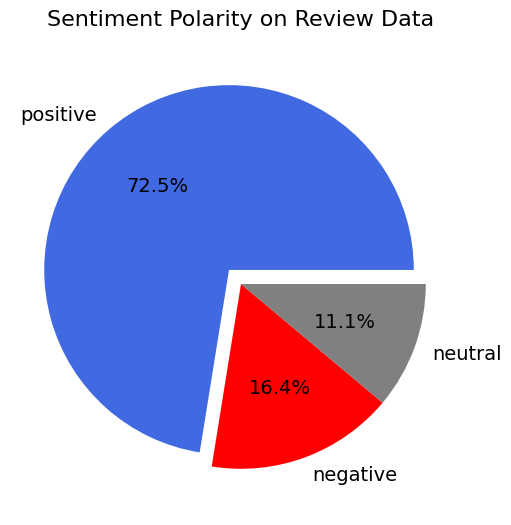

In [ ]:
# Membuat visualisasi untuk polaritas sentimen
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen ke dalam list sizes dan labels
sizes = clean_df['polarity'].value_counts().values
labels = clean_df['polarity'].value_counts().index.tolist()

# Memberikan warna per sentimen
color_map = {
    'positive': 'royalblue',
    'negative': 'red',
    'neutral': 'gray'
}
colors = [color_map[label] for label in labels]

# Membuat efek explode, hanya memisahkan bagian pertama dari pie chart.
explode = [0.1] + [0 for _ in range(len(sizes) - 1)]

# Membuat pie chart
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14}, colors=colors)

# Menetapkan judul
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 3000) # Menampilkan seluruh isi kolom hingga 3000 karakter

# Fungsi untuk membuat DataFrame berdasarkan polaritas
def create_sentiment_df(df, sentiment):
  sentiment_df = df.loc[df['polarity'] == sentiment, ['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
  sentiment_df = sentiment_df.sort_values(by='polarity_score', ascending=False).reset_index(drop=True)
  sentiment_df.index += 1
  return sentiment_df

positive_reviews = create_sentiment_df(clean_df, 'positive')
negative_reviews = create_sentiment_df(clean_df, 'negative')
neutral_reviews = create_sentiment_df(clean_df, 'neutral')

In [ ]:
# Fungsi untuk membuat dan menampilkan WordCloud
def plot_wordcloud(data, title):
  all_words = ''
  for sentence in data:
    for word in sentence:
      all_words += ' ' + word
  wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(all_words)
  plt.figure(figsize=(8, 6))
  plt.title(title, fontsize=18)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

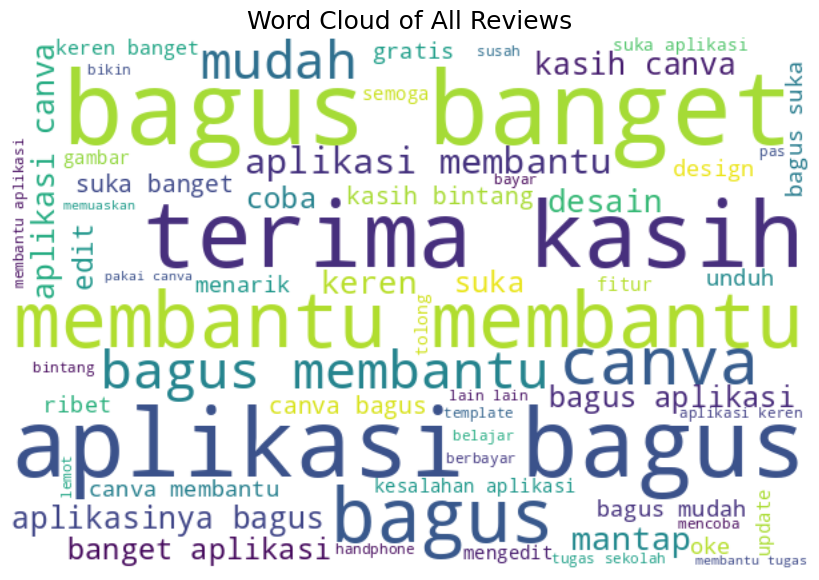

In [ ]:
# WordCloud untuk semua review
plot_wordcloud(clean_df['text_stopword'], 'Word Cloud of All Reviews')

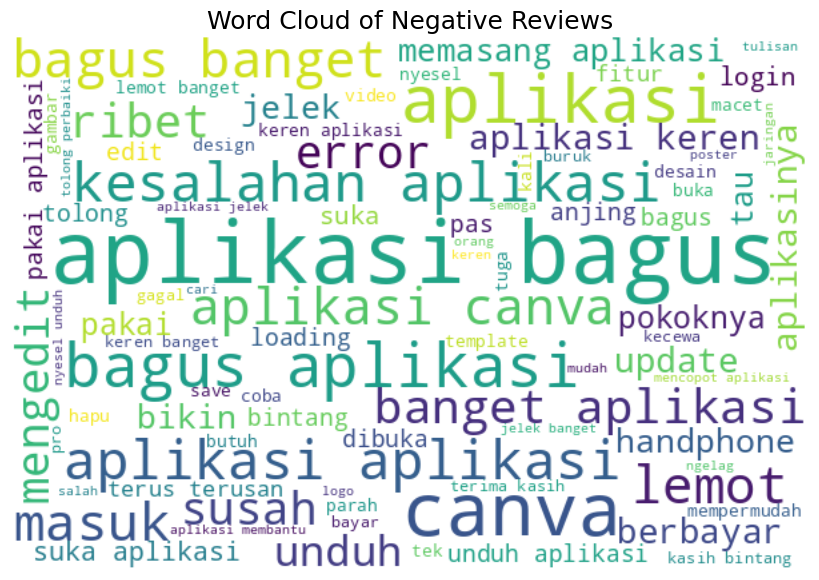

In [ ]:
# WordCloud untuk review negatif
plot_wordcloud(negative_reviews['text_stopword'], 'Word Cloud of Negative Reviews')

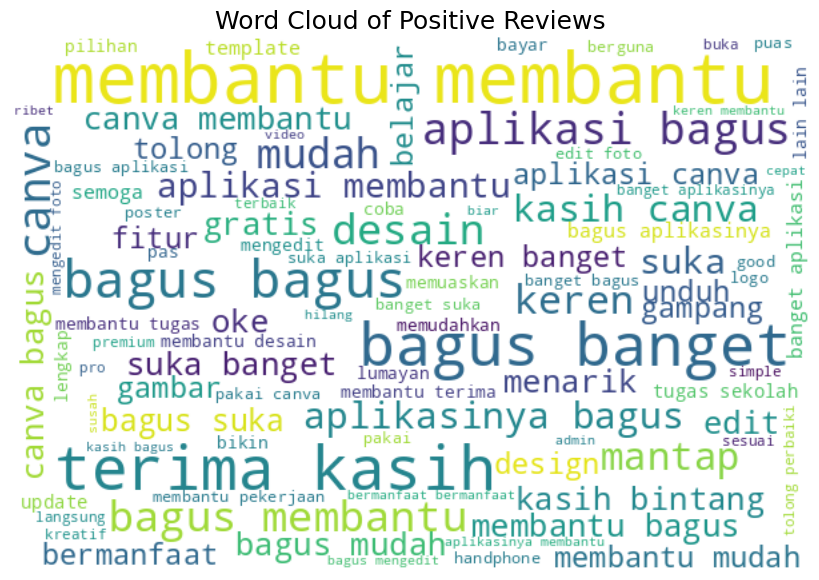

In [ ]:
# WordCloud untuk review positif
plot_wordcloud(positive_reviews['text_stopword'], 'Word Cloud of Positive Reviews')

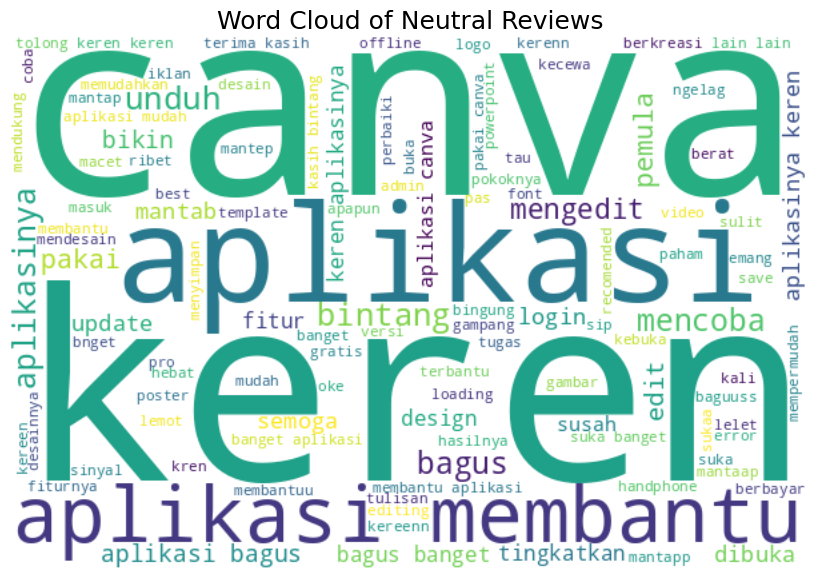

In [ ]:
# WordCloud untuk review netral
plot_wordcloud(neutral_reviews['text_stopword'], 'Word Cloud of Neutral Reviews')

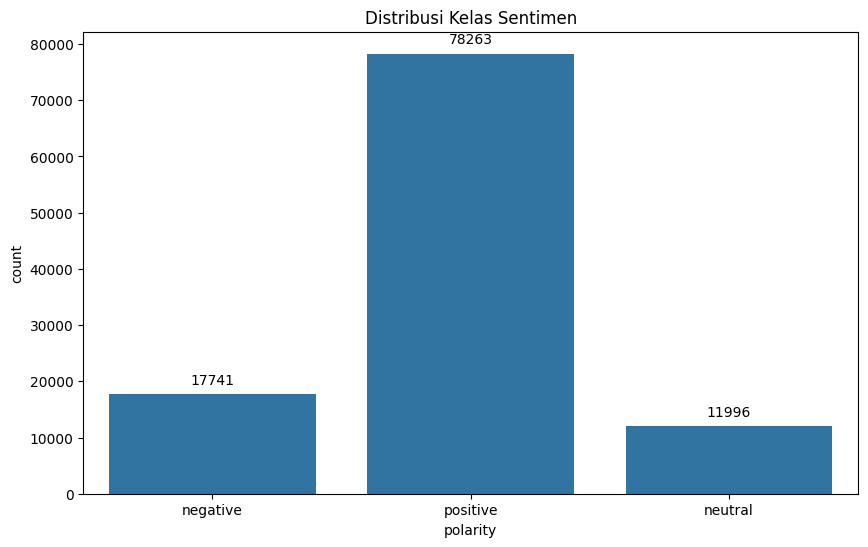

In [ ]:
# Visualisasi distribusi kelas sentimen
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='polarity', data=clean_df)
plt.title('Distribusi Kelas Sentimen')

# Menampilkan jumlah di atas bar
for p in ax.patches:ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                                xytext=(0, 10), textcoords='offset points')
plt.show()

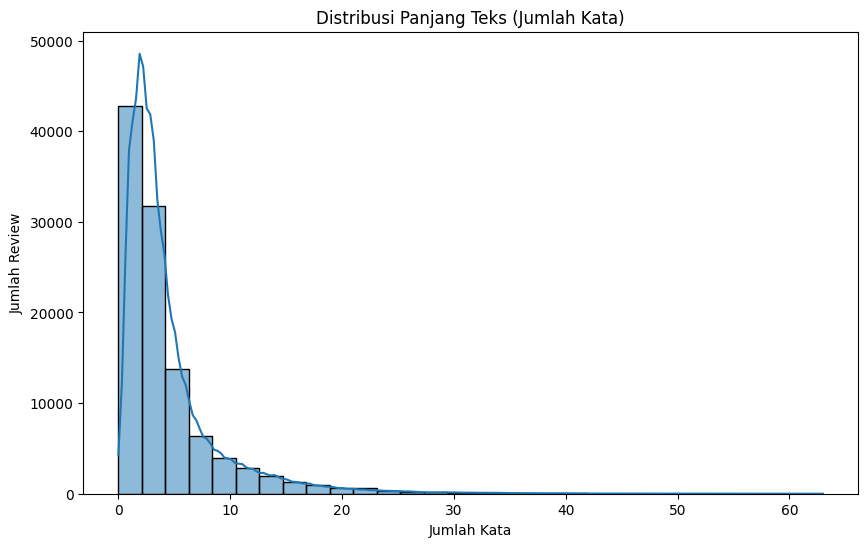

In [ ]:
# Menambahkan kolom panjang teks
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))

# Visualisasi distribusi panjang teks
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['text_length'], bins=30, kde=True)
plt.title('Distribusi Panjang Teks (Jumlah Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Review')
plt.show()

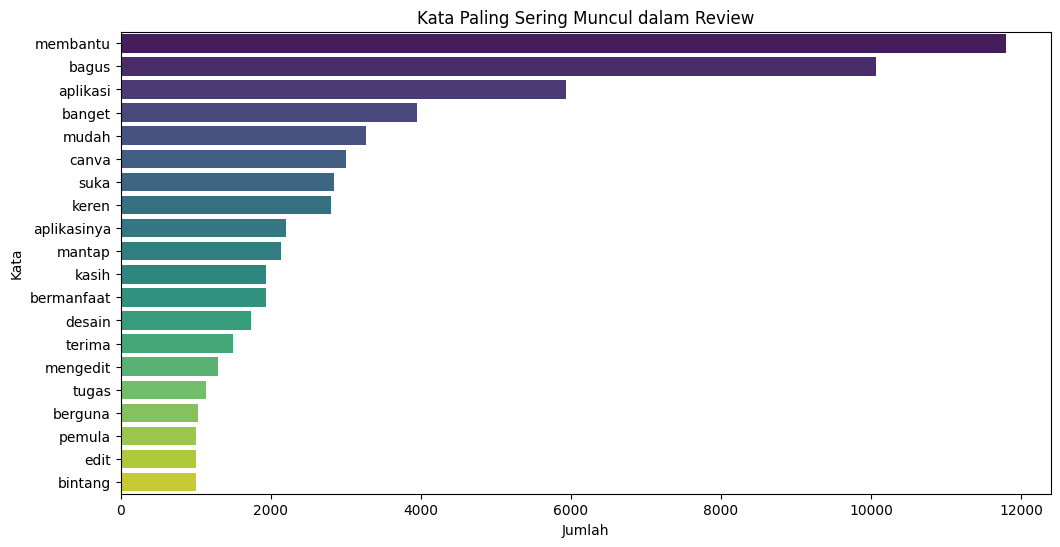

In [ ]:
# Visualisasi 20 kata paling sering muncul
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Menghitung total skor tiap kata
word_freq = tfidf_df.sum().reset_index(name='jumlah')
word_freq.columns = ['kata', 'jumlah']
top_words = word_freq.sort_values('jumlah', ascending=False).head(20)

sns.barplot(x='jumlah', y='kata', data=top_words, palette='viridis', hue='kata')
plt.title('Kata Paling Sering Muncul dalam Review')
plt.xlabel('Jumlah')
plt.ylabel('Kata')
plt.show()

In [ ]:
# Menyimpan ke CSV

clean_df.to_csv('ulasan_canva.csv', index=False, encoding='utf-8')

Insight:
- Berdasarkan pie chart 'Sentiment Polarity on Review Data', kebanyakan ulasan untuk aplikasi Canva bersentimen positif (72,5%) yang mengindikasikan bahwa mayoritas pengguna memiliki pengalaman yang baik saat menggunakan aplikasi tersebut. Selain itu, terdapat pula sentimen negatif (16,4%) dan sentimen netra (11,1%) yang mengindikasikan sebagian kecil pengguna merasa tidak puas dan sebagian lainnya merasa biasa saja, tidak buruk tetapi tidak terlalu memuaskan, terhadap layanan aplikasi.
- Berdasarkan visualisasi word cloud untuk semua review, terlihat bahwa sentimen positif mendominasi yang menunjukkan bahwa mayoritas pengguna merasa puas dan terbantu oleh aplikasi Canva.
- Berdasarkan visualisasi word cloud untuk Negative review, terlihat bahwa kata seperti 'kesalahan', 'error', 'lemot', 'susah masuk', dan masalah teknis lainnya mendominasi sebagai keluhan utama. Ini mengindikasikan bahwa banyak pengguna mengalami kesulitan saat menggunakan aplikasi Canva yang mungkin dipicu oleh masalah teknis, performa lambat, dan fitur berbayar. Pengguna pun menunjukkan kekecewaannya dengan menggunakan kata-kata seperti 'ribet', 'jelek', hingga 'nyesel'.
- Berdasarkan visualisasi word cloud untuk Positive review, terlihat bahwa kata 'membantu', 'bermanfaat', dan 'memudahkan' cukup mendominasi yang mengindikasikan bahwa aplikasi ini sangat berguna bagi pengguna. Sebagai bentuk penghargaan, banyak pengguna memberikan pujian atas kualitas baik aplikasi mengggunakan kata 'bagus', 'keren', 'mantap', hingga 'terima kasih'.
- Berdasarkan visualisasi word cloud untuk Neutral review, terlihat bahwa kata 'canva' sangat mendominasi yang dapat mengindikasikan bahwa pengguna banyak menyebut brand secara eksplisit. Ini menunjukkan tingginya tingkat kesadaran dan penggunaan oleh pengguna. Selain itu, kata 'keren' dan 'membantu' terlihat cukup menonjol yang menunjukkan bahwa keunggulan apilkasi diakui oleh pengguna tetapi tidak menonjolkan emosi. Ada pula kata saran dan harapan yang mengindikasikan bahwa pengguna dengan sentimen netral mencoba memberikan masukan konstruktif untuk peningkatan kualitas dari aplikasi.
- Berdasarkan visualisasi 'Distribusi Kelas Sentimen', terlihat bahwa sentimen Positive unggul dengan 78263 ulasan, diikui sentimen Negative dengan 17741 ulasan, dan sentimen Neutral dengan 11996 ulasan.
- Berdasarkan visualisasi 'Distribusi Panjang Teks (Jumlah Kata), terlihat bahwa puncak distribusi berada di 1-5 kata yang mengindikasikan bahwa mayoritas ulasan bersifat singkat. Distribusi ini menunjukkan bahwa ulasan lebih dari 20 kata berjumlah sangat sedikit, yang mana cukup umum terjadi.
- Berdasarkan visualisasi 'Kata Paling Sering Muncul dalam Review' yang menampilkan 20 kata teratas, diketahui bahwa kata "membantu" menjadi kata yang paling sering digunakan oleh pengguna dalam ulasan, dengan jumlah kemunculan mencapai 12.000 kali. Hal ini menunjukkan bahwa banyak pengguna merasa aplikasi ini memberikan manfaat nyata dalam penggunaan sehari-hari. Selain itu, kata-kata lain yang juga sering muncul adalah "bagus", "aplikasi", "banget", dan "mudah", yang mencerminkan kesan umum pengguna terhadap aplikasi.